In [1]:
import os
import sys
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers, optimizers
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
data_path = '/kaggle/input/ravdess1/'

In [3]:
train_features_df = pd.read_csv(data_path + 'train_dataset_augmented.csv')
test_features_df = pd.read_csv(data_path + 'test_dataset_augmented.csv')

In [4]:
X_train = train_features_df.iloc[:, :-1]
y_train = train_features_df.iloc[:, -1:]

X_test = test_features_df.iloc[:, :-1]
y_test = test_features_df.iloc[:, -1:]

In [5]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.transform(np.array(y_test).reshape(-1,1)).toarray()

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [8]:
x_train_cnn, x_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [9]:
def CNN_model():
    model = models.Sequential()

    model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

    return model

In [10]:
CNN_clasifier = CNN_model()
hist = CNN_clasifier.fit(x_train_cnn, y_train_cnn, batch_size=256, epochs=1000, validation_data=(x_valid_cnn, y_valid_cnn))

2022-12-27 01:12:17.739046: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:12:17.740493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:12:18.035153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:12:18.036335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 01:12:18.037454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/1000


2022-12-27 01:12:26.568942: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12/12 [==============================] - 13s 54ms/step - loss: 2.0727 - accuracy: 0.1263 - val_loss: 2.0625 - val_accuracy: 0.1654
Epoch 2/1000
12/12 [==============================] - 0s 14ms/step - loss: 2.0489 - accuracy: 0.1572 - val_loss: 2.0437 - val_accuracy: 0.1538
Epoch 3/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0276 - accuracy: 0.1521 - val_loss: 2.0196 - val_accuracy: 0.1577
Epoch 4/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0081 - accuracy: 0.1463 - val_loss: 2.0017 - val_accuracy: 0.1519
Epoch 5/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0009 - accuracy: 0.1569 - val_loss: 1.9899 - val_accuracy: 0.1750
Epoch 6/1000
12/12 [==============================] - 0s 13ms/step - loss: 1.9863 - accuracy: 0.1654 - val_loss: 1.9821 - val_accuracy: 0.2096
Epoch 7/1000
12/12 [==============================] - 0s 13ms/step - loss: 1.9865 - accuracy: 0.1779 - val_loss: 1.9778 - val_accuracy: 0.2385
Epoch 8/100

9/9 [==============================] - 0s 15ms/step - loss: 2.7351 - accuracy: 0.6561
Accuracy of our model on test data :  65.61403274536133 %


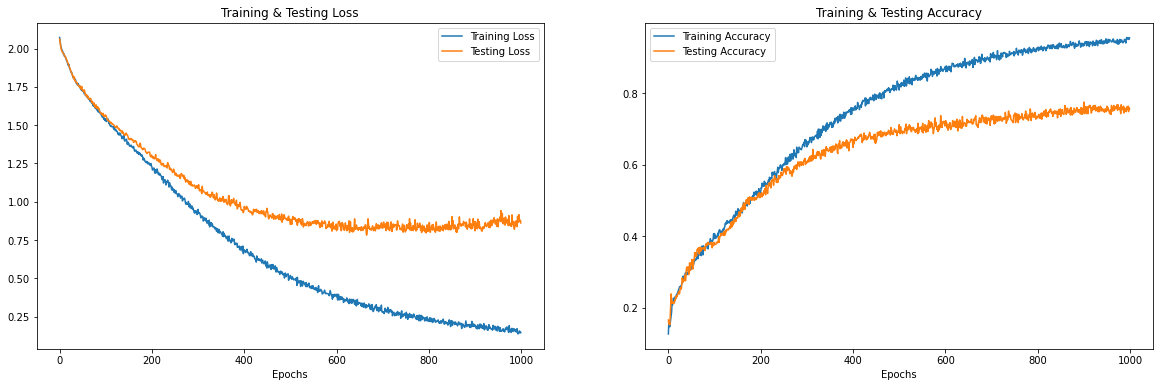

In [11]:
print("Accuracy of our model on test data : " , CNN_clasifier.evaluate(X_test, y_test)[1]*100 , "%")

epochs = [i for i in range(1000)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [12]:
pred_test = CNN_clasifier.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

In [13]:
compare = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
compare['Predicted Labels'] = y_pred.flatten()
compare['Actual Labels'] = y_test.flatten()

compare.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,calm,calm
2,calm,calm
3,sad,fear
4,calm,calm
5,surprise,surprise
6,angry,angry
7,happy,fear
8,sad,sad
9,sad,fear


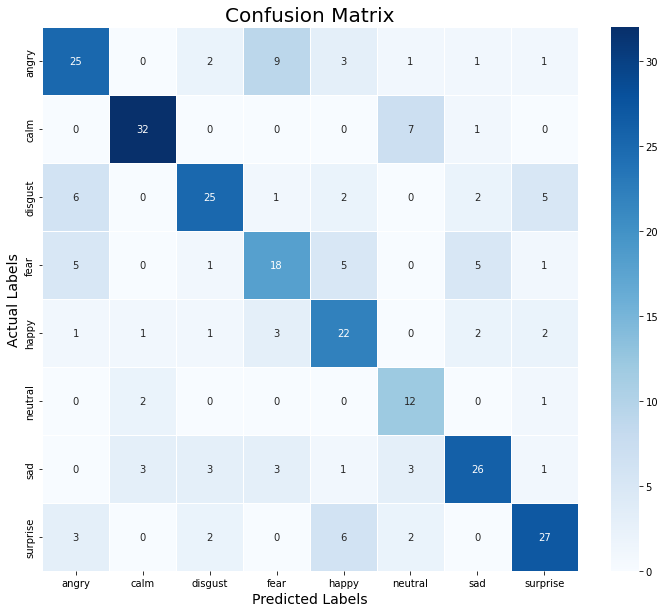

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.62      0.60      0.61        42
        calm       0.84      0.80      0.82        40
     disgust       0.74      0.61      0.67        41
        fear       0.53      0.51      0.52        35
       happy       0.56      0.69      0.62        32
     neutral       0.48      0.80      0.60        15
         sad       0.70      0.65      0.68        40
    surprise       0.71      0.68      0.69        40

    accuracy                           0.66       285
   macro avg       0.65      0.67      0.65       285
weighted avg       0.67      0.66      0.66       285

